In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [95]:
df = pd.read_csv('../data/csv/Tipo di località (IT1,122_54_DF_DCSC_TUR_6,1.0).csv')
df['OBS_VALUE'] = df['OBS_VALUE'] / 1000000
df.head()

,DATAFLOW,FREQ,REF_AREA,DATA_TYPE,ADJUSTMENT,TYPE_ACCOMMODATION,ECON_ACTIVITY_NACE_2007,COUNTRY_RES_GUESTS,LOCALITY_TYPE,URBANIZ_DEGREE,...,NOTE_ECON_ACTIVITY_NACE_2007,NOTE_COUNTRY_RES_GUESTS,NOTE_LOCALITY_TYPE,NOTE_URBANIZ_DEGREE,NOTE_COASTAL_AREA,NOTE_SIZE_BY_NUMBER_ROOMS,NOTE_TIME_PERIOD,BASE_PER,UNIT_MEAS,UNIT_MULT
0,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='TIME_PERIOD'>

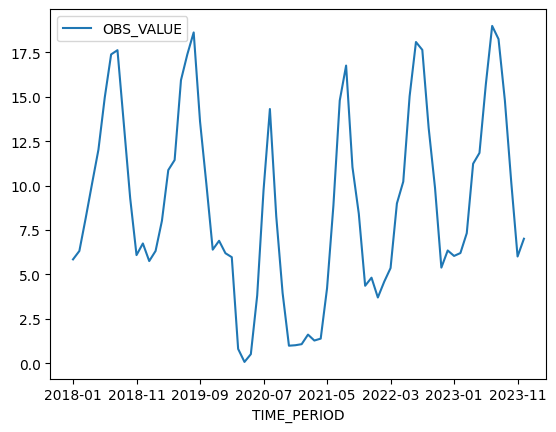

In [96]:
arrivals_per_month = df[(df['COUNTRY_RES_GUESTS'] == 'WORLD') & (df['TYPE_ACCOMMODATION'] == 'ALL') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) > 4) & (df['LOCALITY_TYPE'] == 'ALL')]
arrivals = arrivals_per_month[['TIME_PERIOD', 'OBS_VALUE']].set_index('TIME_PERIOD')
months = arrivals.index.to_series().apply(lambda x: x.split('-')[1]).unique()
years = arrivals.index.to_series().apply(lambda x: x.split('-')[0]).unique()
arrivals.plot()

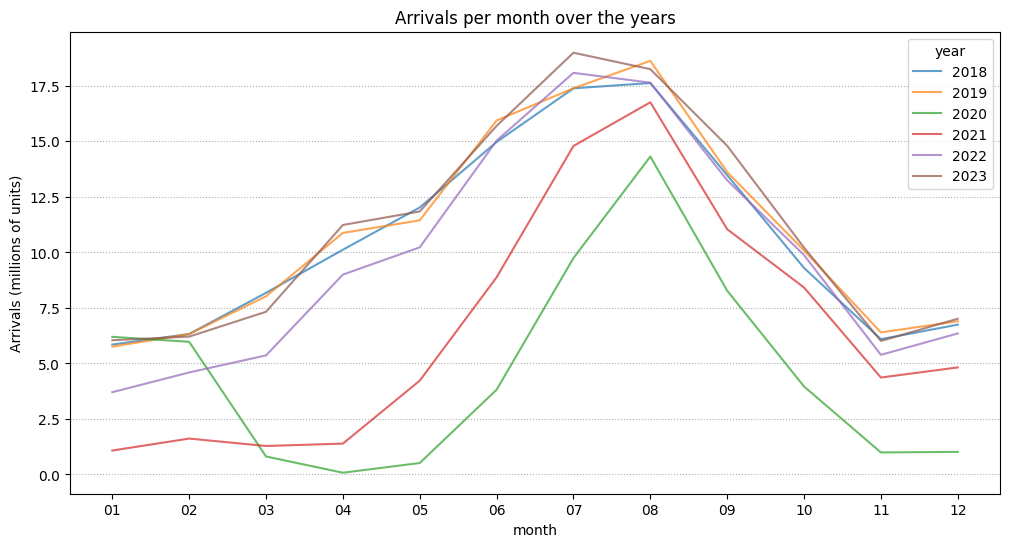

In [97]:
fig, ax = plt.subplots(figsize=(12, 6))

for year in years:
  monthly_data = arrivals[arrivals.index.str.startswith(year)]
  plt.plot(monthly_data.index.str[-2:], monthly_data['OBS_VALUE'], label=year, alpha=0.7)

plt.ylabel("Arrivals (millions of units)")
plt.xlabel("month")
plt.title("Arrivals per month over the years")
plt.legend(title="year")
plt.grid(True, axis='y', linestyle=':')

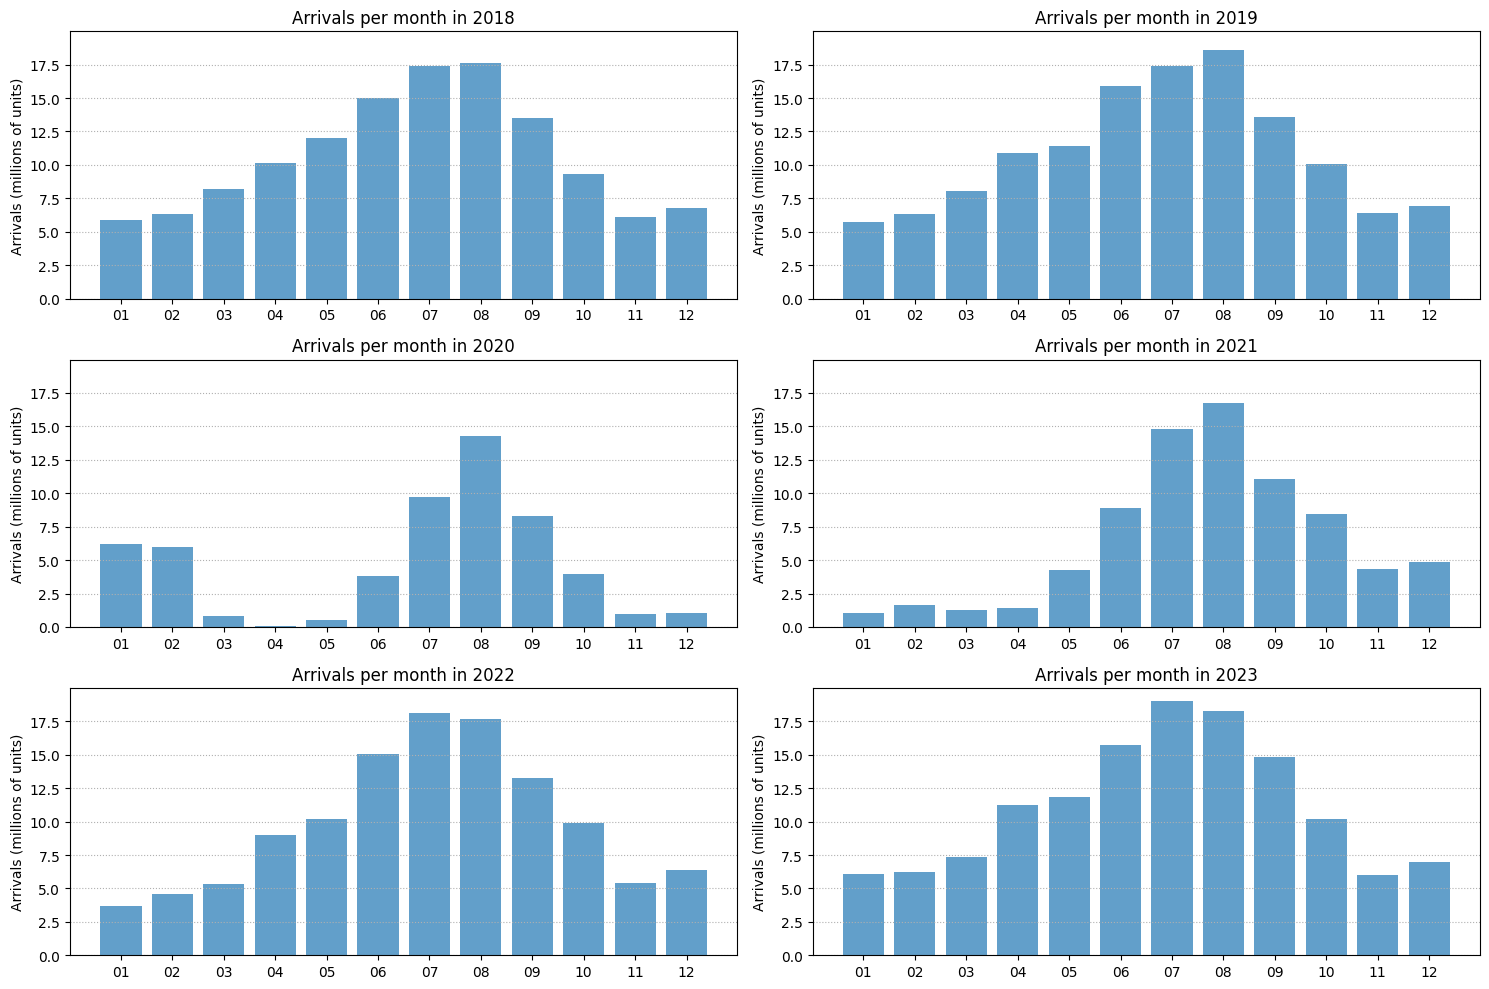

In [98]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

max_y_value = arrivals['OBS_VALUE'].max()
for i, year in enumerate(years):
  ax = axs[i // 2, i % 2]
  monthly_data = arrivals[arrivals.index.str.startswith(year)]
  ax.bar(monthly_data.index.str[-2:], monthly_data['OBS_VALUE'], alpha=0.7)
  ax.set_title(f'Arrivals per month in {year}')
  ax.set_ylabel("Arrivals (millions of units)")
  ax.set_ylim(0, max_y_value+1)  # Set the same y-axis limit for all subplots
  ax.grid(True, axis='y', linestyle=':')

plt.tight_layout()
plt.show()

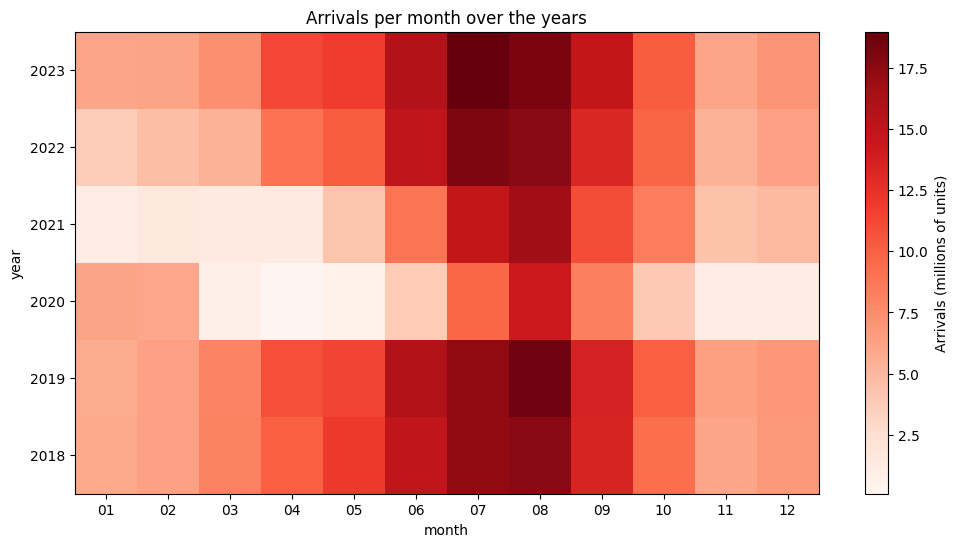

In [99]:
matrix = np.array([[arrivals.loc[f'{year}-{month}', 'OBS_VALUE'] if f'{year}-{month}' in arrivals.index else 0 for month in months] for year in years])
plt.figure(figsize=(12, 6))
c = plt.pcolormesh(months, years, matrix, cmap='Reds')
plt.colorbar(c, label="Arrivals (millions of units)")
plt.xlabel("month")
plt.ylabel("year")
plt.title("Arrivals per month over the years")
plt.show()

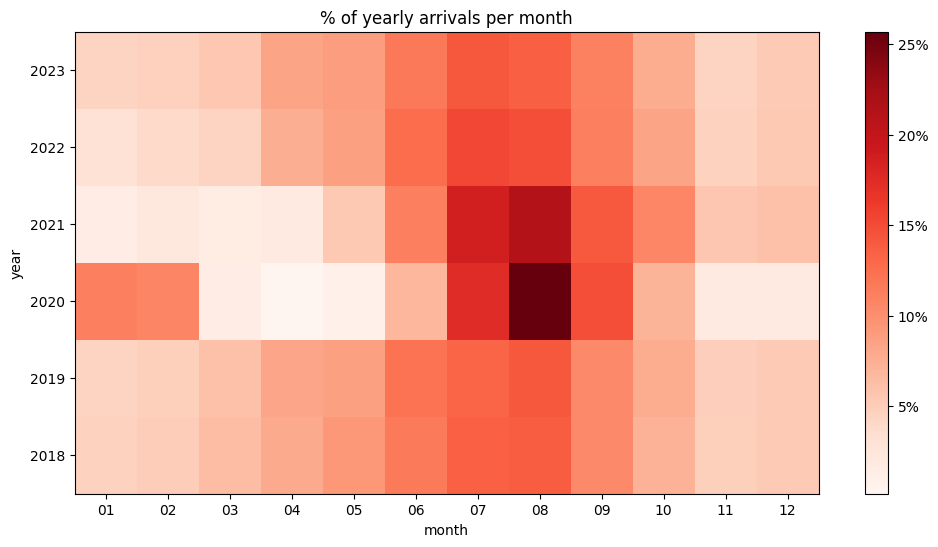

In [100]:
total_arrivals_per_year = arrivals.groupby(arrivals.index.str[:4]).sum()
percentages = (matrix / total_arrivals_per_year.values) * 100

fig, ax = plt.subplots(figsize=(12, 6))
c = plt.pcolormesh(months, years, percentages, cmap='Reds')

colorbar = plt.colorbar(c)
colorbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.xlabel("month")
plt.ylabel("year")
plt.title("% of yearly arrivals per month")
plt.show()